In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import networkx as nx
import music21 as msc
from funciones import *
import sys
import os
from music21 import corpus

env = msc.environment.UserSettings()
#env['musicxmlPath'] = r'C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe' #Path a la aplicacion Finale
#env['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'          #Path a la aplicacion MuseScore 
#env['musicxmlPath']='/usr/bin/mscore'
msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')


In [ ]:
#---------------------------------------------------------------------
#Funciones:
#Lista de funciones:
# f_xml2graph (cancion, nombre_parte=0,modelo='melodia')
# graficar (G, color_map='rainbow',layout='espiral', labels=False)
# ql_2_fig (ql)
# f_motifs_rhytmic (cancion,length,nombre_parte=0)
# f_motifs_tonal (cancion,length,nombre_parte=0)
# f_grado_dist_M (G)
# f_grado_dist_R (G)
# f_tabla (G,nombre)
# f_xml2graph_armonia (cancion, index)
# f_armon (cancion, indexes)
# graficar_armonias_undirected(G, color_map='rainbow',layout='espiral')
# graficar_armonias_directed(Armonias)
# f_dist_escalas (cancion, nombre_parte=0)
# f_full_graph(path)
# f_hierarchy(G)
# f_transitivity_motifs(G)
# f_rewiring_directed(G)

In [18]:
#---------------------------------------------------------------------------------------
#Análisis de ARTISTAS (tdoas las voces pegoteadas)
#---------------------------------------------------------------------
#Empecemos con un analisis de un artista, lo pasamos a 2 y después lo pasamos a género
#Para clásica, usamos la base de datos de music21, para Bach son muchisimas asi que pruebo con Mozart que son 16 (tarda 1min)

#musicos_1=['mozart', 'bach', 'beethoven'] #son los más conocidos y que más biblio tienen 
musicos_1=['mozart']
#creo una lista que contenga los grafos con cada artista,va a ser una ls de ls de 4 elemen: [[M,R,D,U]]
H=[]
K=[]
G=[]

for l, musico in enumerate(musicos_1):
    m=nx.DiGraph()
    r=nx.Graph()
    ad=nx.MultiDiGraph()
    au=nx.MultiGraph()
    paths = corpus.getComposer(musico)
    paths=paths[0:20] #corta hasta los primeros 20 temas
    for i, path in enumerate(paths):
        M1,R1,D1,U1=f_full_graph(path)
        H.append([M1,R1,D1,U1])
        
    for l in range(len(H)):
        M1=nx.compose(m,H[l][0])
        R1=nx.compose(r,H[l][1])
        D1=nx.compose(ad,H[l][2])
        U1=nx.compose(au,H[l][3])
    G.append([musico,M1,R1,D1,U1]) 

# Ahora buscamos los artistas que nosotros encontramos, vamos a trabajar con los beatles
#musicos_2=['Bealtes','Charly'] #aca se podrian ir agregando si trabajasemos con más tipo Queen y Charly
musicos_2=['Charly']
for l, musico in enumerate(musicos_2):
    m=nx.DiGraph()
    r=nx.Graph()
    ad=nx.MultiDiGraph()
    au=nx.MultiGraph()
    myFolder = (os.getcwd()+'\\partituras\\Rock\\'+musico) # busca en el directorio actual
    arch=os.listdir(myFolder) #lista con los nombres de las canciones
    paths=[] #lista con las direcciones completas
    for i, arc in enumerate(arch):
        paths.append(myFolder+'\\'+arc)

    paths=paths[0:20]
    for i, path in enumerate(paths):
        M2,R2,D2,U2=f_full_graph(path)
        K.append([M2,R2,D2,U2])
        
    for l in range(len(K)):
        M2=nx.compose(m,K[l][0])
        R2=nx.compose(r,K[l][1])
        D2=nx.compose(ad,K[l][2])
        U2=nx.compose(au,K[l][3])
    G.append([musico,M2,R2,D2,U2]) 

musicos=musicos_1+musicos_2

In [25]:
G[0][1]
graficar(G[1][1],color_map='rainbow',layout='espiral',labels=False)

ValueError: min() arg is an empty sequence

In [23]:
l

0

ValueError: min() arg is an empty sequence

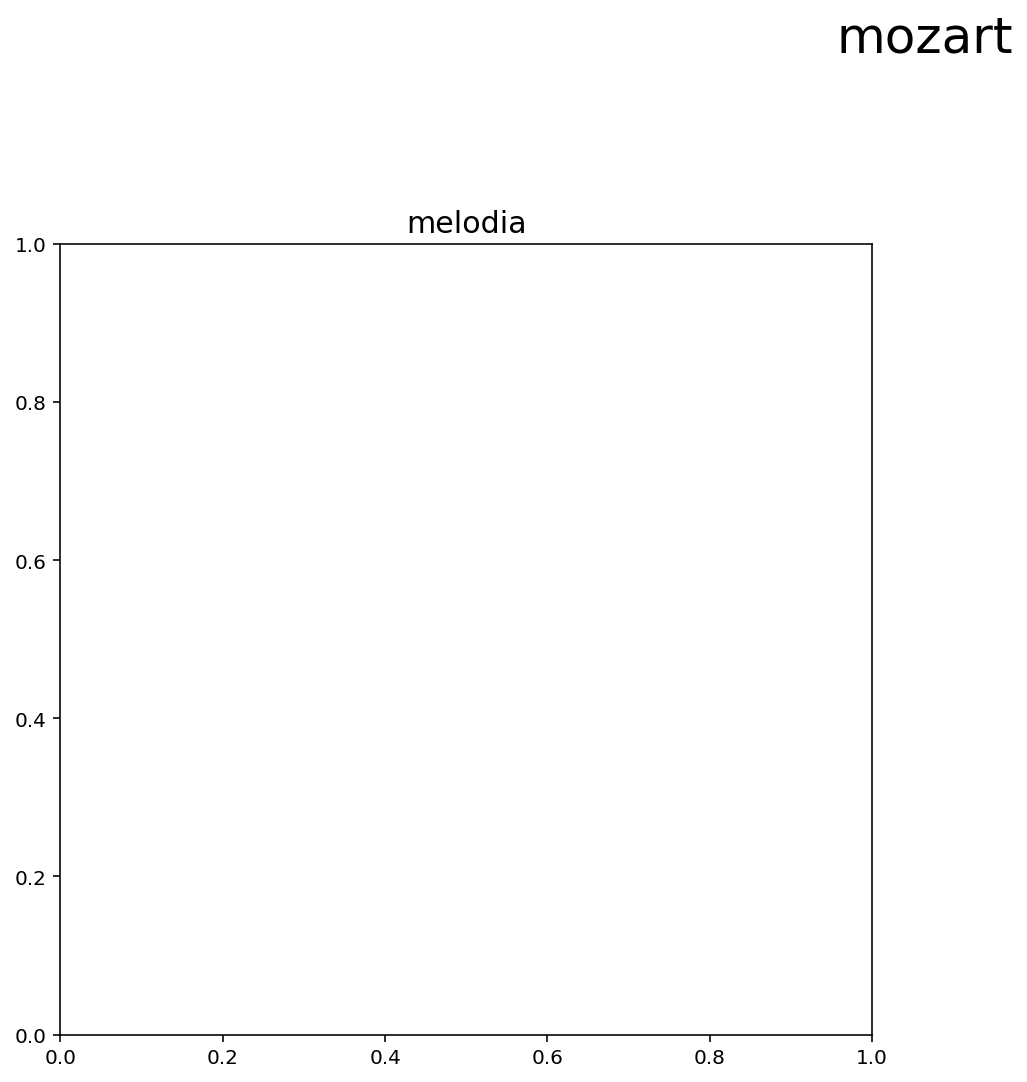

In [19]:
#---------------------------------------------------------------------
#Graficamos todos los artistas  
#outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

for l,musico in enumerate(musicos):

    plt.figure(figsize=(16,16))
    plt.suptitle(musico,fontsize=25)
    
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    graficar(G[l][1],color_map='rainbow',layout='espiral',labels=False)

    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    graficar(G[l][2],color_map='rainbow',layout='espiral',labels=False)
    
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    graficar(G[l][3],labels=False)
    
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    graficar(G[l][4],labels=False)

    #plt.savefig(outfolder+musico+'_grafos.png')
    plt.show()

#---------------------------------------------------------------------
    #Graficamos sus distribuciones de grados y creamos una tabla 
    plt.figure(figsize=(16,16))
    plt.suptitle(musico,fontsize=25)
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    f_grado_dist_M(G[l][1])

    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    f_grado_dist_R(G[l][2])
    
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    f_grado_dist_M(G[l][3])
    
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    f_grado_dist_R(G[l][4])
    
    #plt.savefig(outfolder+musico+'_distribuciones.png')
    plt.show()

    pd_m=f_tabla(G[l][1],musico)
    pd_r=f_tabla(G[l][2],musico)
    pd_AD=f_tabla(G[l][3],musico)
    pd_AU=f_tabla(G[l][4],musico)
    frames = [pd_m, pd_r, pd_AD, pd_AU]
    result = pd.concat(frames)
    #result.to_csv(outfolder+musico)
    
#---------------------------------------------------------------------

result



In [ ]:
#---------------------------------------------------------------------------------------
#Análisis por GÉNERO
#---------------------------------------------------------------------
#¡POR SUERTE! separamos los musicos por género (?)
#Veamos Clasico vs Rock, para eso vamos a hacer los mismos análisis pero vamos a pegotear todavia más los grafos
#Tomamos la parte correspondiente de G que es de clásico
Lclasic=len(musicos_1)
Lrock=len(musicos_2)

#creo una lista de grafos que va a tener todas las tuples de melodia y ritmo para clasica y rock
clasicos_mel=[]
clasicos_rit=[]
clasicos_armonD=[]
clasicos_armonU=[]

rock_mel=[]
rock_rit=[]
rock_armonD=[]
rock_armonU=[]

M_cl=nx.DiGraph()
R_cl=nx.Graph()
AD_cl=nx.DiGraph()
AU_cl=nx.Graph()

M_rk=nx.DiGraph()
R_rk=nx.Graph()
AD_rk=nx.DiGraph()
AU_rk=nx.Graph()

H=[] #creo una lista que contenga los grafos con cada genero, va a ser una ls de ls de 4 elemen: [[M,R,D,U]]
generos=('clasico', 'rock')
for i,mus in enumerate(musicos):
    if i <= Lclasic:
        clasicos_mel.append(G[i][0])
        clasicos_rit.append(G[i][1])
        clasicos_armonD.append(G[i][2])
        clasicos_armonU.append(G[i][3])
    else:
        rock_mel.append(G[i][0])
        rock_rit.append(G[i][1])
        rock_armonD.append(G[i][2])
        rock_armonU.append(G[i][3])
        
#Listo ya separamos en género, ahora vamos a mergearlos
#primero los clasicos
for i, g in enumerate(clasicos_mel):
    M_cl=nx.compose(M_cl,clasicos_mel[i])
    R_cl=nx.compose(R_cl,clasicos_rit[i])
    AD_cl=nx.compose(AD_cl, clasicos_armonD[i])
    AU_cl=nx.compose(AU_cl, clasicos_armonU[i])

H.append([M_cl, R_cl, AD_cl, AU_cl])

#ahora el rock
for i, g in enumerate(rock_mel):
    M_rk=nx.compose(M_rk,rock_mel[i])
    R_rk=nx.compose(R_rk,rock_rit[i])
    AD_rk=nx.compose(AD_rk, rock_armonD[i])
    AU_rk=nx.compose(AU_rk, rock_armonU[i])

H.append([M_rk, R_rk, AD_rk, AU_rk])

    

In [ ]:
#---------------------------------------------------------------------
#Graficamos ambos grafos 
outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

for l,gen in enumerate(generos):

    plt.figure(figsize=(16,16))
    plt.suptitle(gen,fontsize=25)
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    graficar(H[l][0],labels=False)
    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    graficar(H[l][1],labels=False)
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    graficar(H[l][3],labels=False)
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    graficar(H[l][3],labels=False)
    plt.savefig(outfolder+gen+'_grafos.png')
    plt.show()

#---------------------------------------------------------------------
    #Graficamos sus distribuciones de grados y creamos una tabla (son 2 por cada cancion en melodia y 1 por rítmica)
    plt.figure(figsize=(16,16))
    plt.suptitle(gen,fontsize=25)
    plt.subplot(2, 2, 1)
    plt.title('melodia',fontsize=15)
    f_grado_dist_M(H[l][0])
    plt.subplot(2, 2, 2)
    plt.title('ritmo',fontsize=15)
    f_grado_dist_R(H[l][1])
    plt.subplot(2, 2, 3)
    plt.title('Armon D',fontsize=15)
    f_grado_dist_M(H[l][3])
    plt.subplot(2, 2, 4)
    plt.title('Armon U',fontsize=15)
    f_grado_dist_R(H[l][3])
    
    plt.savefig(outfolder+gen+'_distribuciones.png')
    plt.show()

    pd_m=f_tabla(H[l][0],musico)
    pd_r=f_tabla(H[l][1],musico)
    pd_AD=f_tabla(H[l][2],musico)
    pd_AU=f_tabla(H[l][3],musico)
    frames = [pd_m, pd_r,pd_AD,pd_AU]
    result = pd.concat(frames)
    result.to_csv(outfolder+gen)
    
#---------------------------------------------------------------------
result


In [ ]:
#---------------------------------------------------------------------------------------
#Análisis por Etapa??
#---------------------------------------------------------------------